In [2]:
import requests
year = 2022
day = 14
url = f"https://adventofcode.com/{year}/day/{day}/input"

with open('cookie.txt', 'r') as file:
    session = file.read()

headers = {'cookie': f"session={session}"}

with open(f'day_{day}_input.txt', 'wb') as file:
    file.write(requests.get(url, headers=headers).content)

In [3]:
import os
if os.path.exists(f"day_{day}_test.txt"):
    test = [x.strip() for x in open(f'day_{day}_test.txt', 'r')]
    for line in test[:10]:
        print(line.strip())
print("---")
if os.path.exists(f"day_{day}_test_2.txt"):
    test_2 = [x.strip() for x in open(f'day_{day}_test_2.txt', 'r')]
    for line in test[:10]:
        print(line.strip())
print("---")
lines = [x.strip() for x in open(f'day_{day}_input.txt', 'r')]
for line in lines[:10]:
    print(line.strip())

498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9
---
---
492,26 -> 492,17 -> 492,26 -> 494,26 -> 494,16 -> 494,26 -> 496,26 -> 496,22 -> 496,26 -> 498,26 -> 498,17 -> 498,26 -> 500,26 -> 500,20 -> 500,26 -> 502,26 -> 502,25 -> 502,26 -> 504,26 -> 504,23 -> 504,26 -> 506,26 -> 506,21 -> 506,26 -> 508,26 -> 508,16 -> 508,26 -> 510,26 -> 510,24 -> 510,26
481,92 -> 481,96 -> 476,96 -> 476,99 -> 487,99 -> 487,96 -> 485,96 -> 485,92
460,73 -> 460,70 -> 460,73 -> 462,73 -> 462,69 -> 462,73 -> 464,73 -> 464,65 -> 464,73 -> 466,73 -> 466,65 -> 466,73 -> 468,73 -> 468,64 -> 468,73 -> 470,73 -> 470,68 -> 470,73 -> 472,73 -> 472,68 -> 472,73
470,76 -> 470,80 -> 466,80 -> 466,84 -> 481,84 -> 481,80 -> 474,80 -> 474,76
492,26 -> 492,17 -> 492,26 -> 494,26 -> 494,16 -> 494,26 -> 496,26 -> 496,22 -> 496,26 -> 498,26 -> 498,17 -> 498,26 -> 500,26 -> 500,20 -> 500,26 -> 502,26 -> 502,25 -> 502,26 -> 504,26 -> 504,23 -> 504,26 -> 506,26 -> 506,21 -> 506,26 -> 508,26 -> 508,16 -> 508,26 -> 510,26 

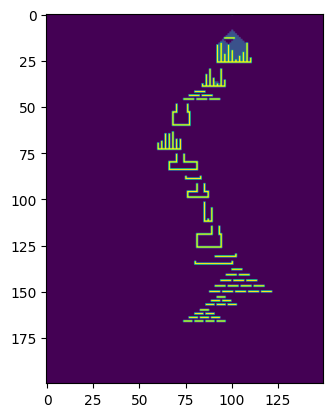

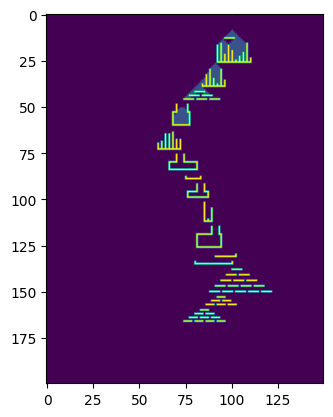

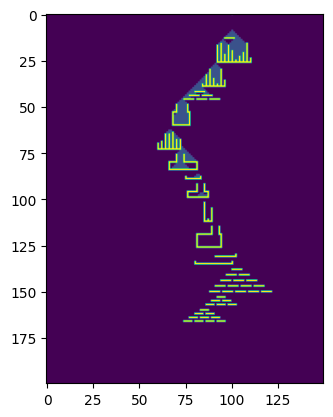

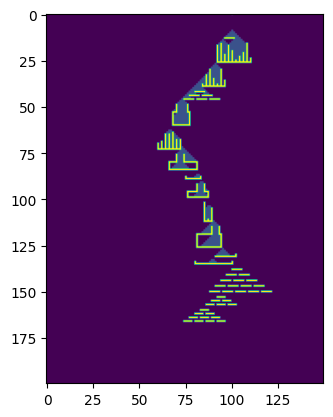

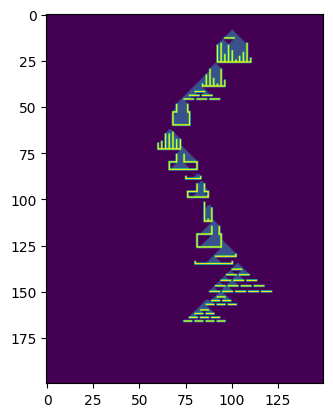

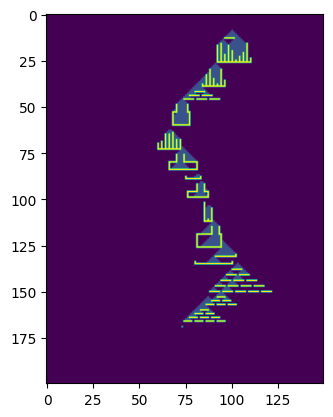

768


In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

run_test = False
if run_test:
    case = test
else:
    case = lines
    
ROW_DIM = 550
COL_DIM = 550

BG = 0
ROCK = 255
SPAWN = 192
SAND = 128
COLD_SAND = 64

map_ = np.array([[BG for y in range(ROW_DIM)] for x in range(COL_DIM)],dtype=np.uint8)

map_[0,500] = SPAWN


def print_map():
    if run_test:
        plt.imshow(map_[:10,490:])
    else:
        plt.imshow(map_[:200,400:])
    plt.show()


rock_lines = []
for line in case:
    coords = line.split(" -> ")

    x = None
    y = None
    for point in [x.split(",") for x in coords]:
        if x == None and y == None:
            x = int(point[0])
            y = int(point[1])
        else:
            nx = int(point[0])
            ny = int(point[1])
            rock_lines.append(((x,y),(nx,ny)))
            x = nx
            y = ny


max_rock_y = 0
for rock_line in rock_lines:
    c0 = min(rock_line[0][0],rock_line[1][0])
    r0 = min(rock_line[0][1],rock_line[1][1])
    
    c1 = max(rock_line[0][0],rock_line[1][0]) + 1
    r1 = max(rock_line[0][1],rock_line[1][1]) + 1
    map_[r0:r1,c0:c1] = ROCK
    
    if r1 > max_rock_y:
        max_rock_y =r1

done = False

def add_sand():
    global done
    new = True
    count_sand = 0
    count_frames = 0
    while True:
        map_[1,500] = SAND
        moved = True
        while moved:
            moved = move_sand()
            if run_test:
                im = Image.fromarray(map_[:14,480:520], 'L')
            else:
                im = Image.fromarray(map_[:200,400:], 'L')
            rgb = Image.merge("RGB",(im,im,im))
            rgb.save(f"day_14_images/{count_frames:05d}.png")
            count_frames += 1
        if done:
            print_map()
            print(count_sand)
            break
        count_sand += 1
        #print_map(True)
        if count_sand % 150 == 0:
            print_map()

    
ABYSS = max_rock_y + 1

def move_sand():
    global done
    sand_x, sand_y = find_sand()
    
    if sand_y > ABYSS:
        done = True
        return False
    
    # try down
    if map_[sand_y+1,sand_x] == BG:
        map_[sand_y,sand_x] = BG
        map_[sand_y+1,sand_x] = SAND
        return True
    
    # try far down
#     if map_[sand_y+1,sand_x] == BG:
#         for n in range(COL_DIM-sand_y):
#             if map_[sand_y+n,sand_x] == ROCK or map_[sand_y+n,sand_x] == COLD_SAND:

#                 map_[sand_y,sand_x] = BG
#                 map_[sand_y+n-1,sand_x] = SAND
#                 return True
    
    # try down/left
    if map_[sand_y+1, sand_x-1] == BG:
        map_[sand_y,sand_x] = BG
        map_[sand_y+1,sand_x-1] = SAND
        return True
    
    # try down/right
    if map_[sand_y+1,sand_x+1] == BG:
        map_[sand_y,sand_x] = BG
        map_[sand_y+1,sand_x+1] = SAND
        return True
    # stop
    map_[sand_y,sand_x] = COLD_SAND
    return False
    
    

def find_sand():
    sand_xy = np.where(map_ == SAND)
    return sand_xy[1][0], sand_xy[0][0]

add_sand()

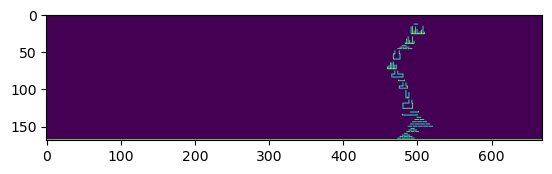

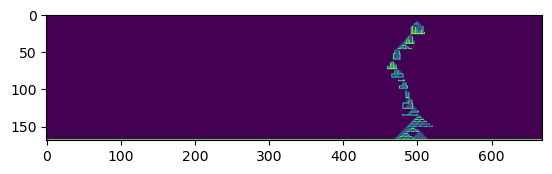

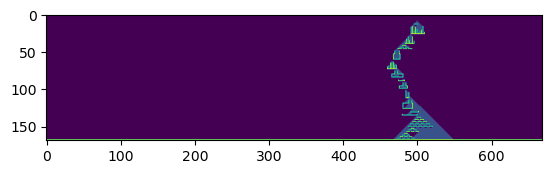

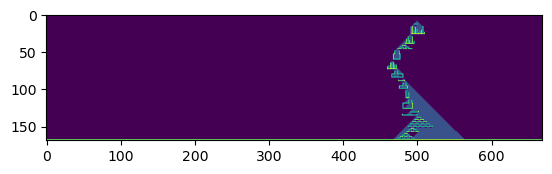

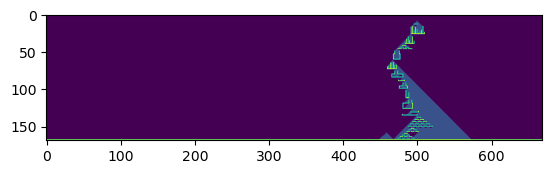

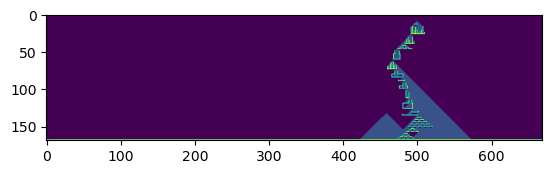

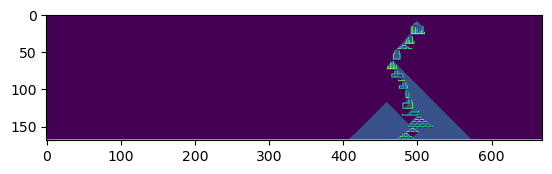

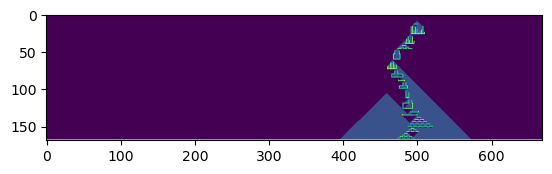

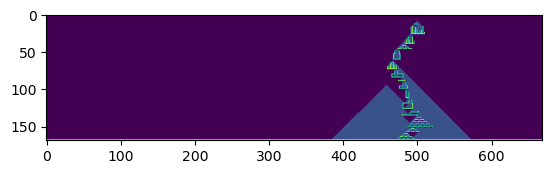

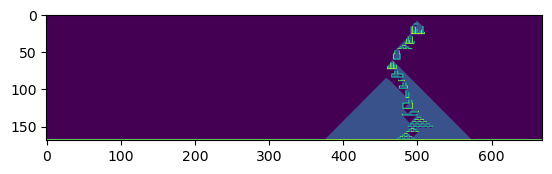

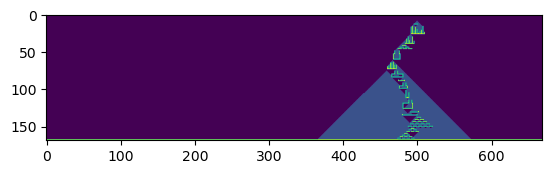

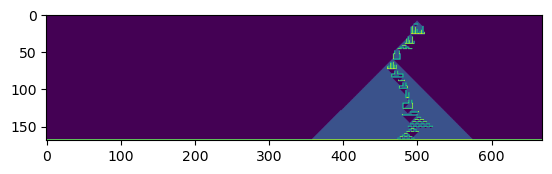

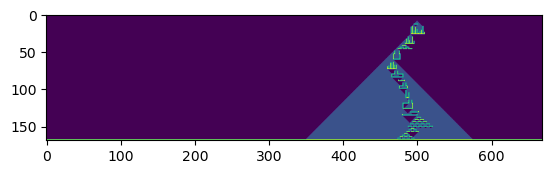

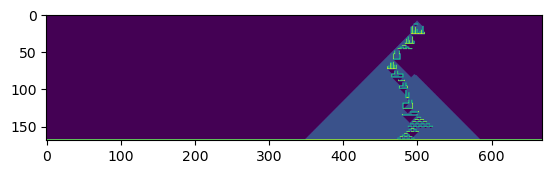

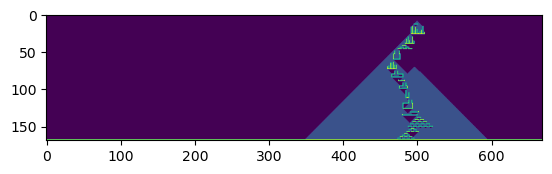

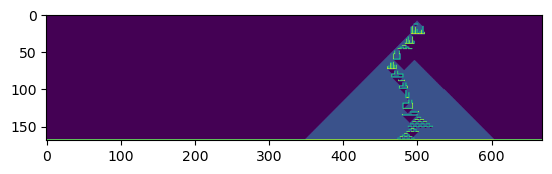

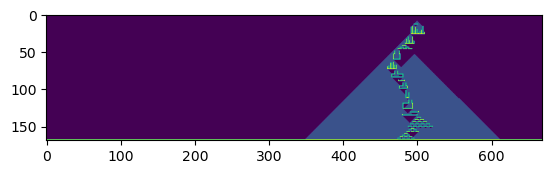

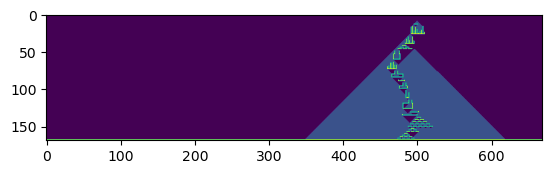

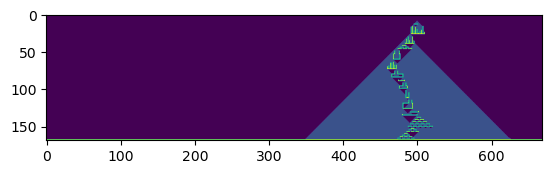

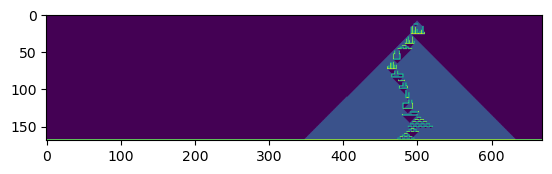

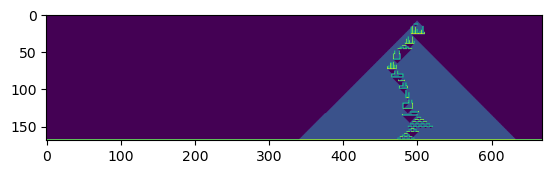

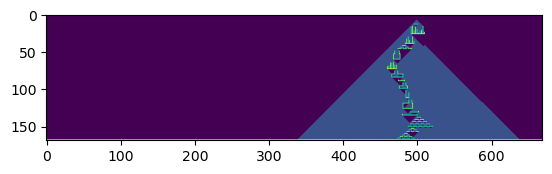

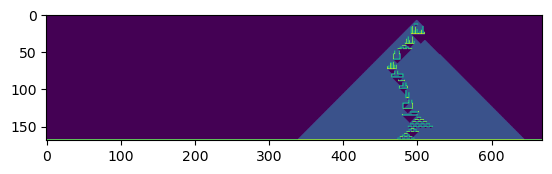

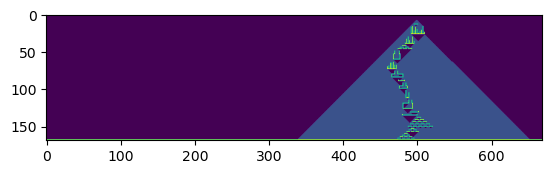

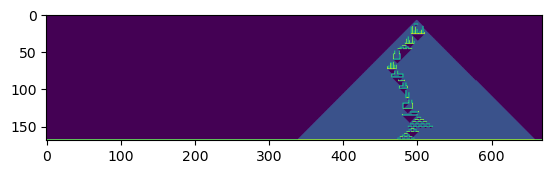

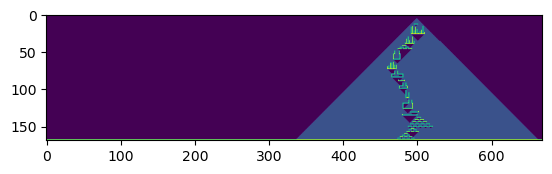

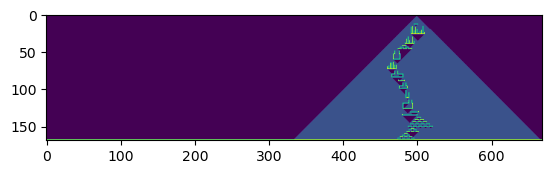

26686


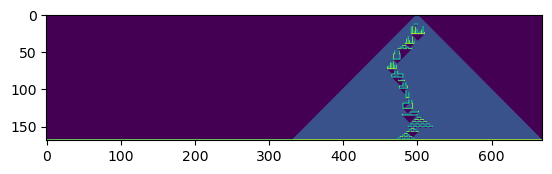

In [219]:
import numpy as np
import matplotlib.pyplot as plt

run_test = False
if run_test:
    case = test
else:
    case = lines


BG = 0
ROCK = 255
SPAWN = 192
SAND = 128
COLD_SAND = 64


rock_lines = []
for line in case:
    coords = line.split(" -> ")

    x = None
    y = None
    for point in [x.split(",") for x in coords]:
        if x == None and y == None:
            x = int(point[0])
            y = int(point[1])
        else:
            nx = int(point[0])
            ny = int(point[1])
            rock_lines.append(((x,y),(nx,ny)))
            x = nx
            y = ny


max_rock_y = 0
for rock_line in rock_lines:
    c0 = min(rock_line[0][0],rock_line[1][0])
    r0 = min(rock_line[0][1],rock_line[1][1])
    
    c1 = max(rock_line[0][0],rock_line[1][0]) + 1
    r1 = max(rock_line[0][1],rock_line[1][1]) + 1
    #map_[r0:r1,c0:c1] = ROCK
    
    if r1 > max_rock_y:
        max_rock_y = r1
        
FLOOR = max_rock_y + 1
    
ROW_DIM = 500 + 2 + max_rock_y

COL_DIM = FLOOR + 1

map_ = np.array([[BG for y in range(ROW_DIM)] for x in range(COL_DIM)],dtype=np.uint8)

map_[FLOOR,:] = ROCK

# map_[4][494] = '#'
# map_[5][494] = '#'
# map_[6][494] = '#'
#map_[ROW][COL]
map_[0,500] = SPAWN

for rock_line in rock_lines:
    c0 = min(rock_line[0][0],rock_line[1][0])
    r0 = min(rock_line[0][1],rock_line[1][1])
    
    c1 = max(rock_line[0][0],rock_line[1][0]) + 1
    r1 = max(rock_line[0][1],rock_line[1][1]) + 1
    map_[r0:r1,c0:c1] = ROCK

def print_map():
    # for j in range(0,YDIM):
    #     if test and j > 10:
    #         continue
    #     output_line = str(j)
    #     for i in range(0,XDIM):
    #         if test and i < 490:
    #             continue
    #         output_line += (map_[i][j])
    #     print(output_line)
    #print(map_[:10,490:])
    if run_test:
        plt.imshow(map_[:13,480:520])
    else:
        plt.imshow(map_)#[:200,400:])
    plt.show()



    #print(map_[r0:r1,c0:c1])
            
#print_map()



done = False

def add_sand():
    global done
    new = True
    count_sand = 0
    while True:
        map_[0,500] = SAND
        moved = True
        while moved:
            moved = move_sand()
        if done:
            count_sand += 1
            print(count_sand)
            print_map()
            break
        count_sand += 1
        if count_sand % 1000 == 0:
            print_map()


#print(max_rock_y + 2)


print_map()

def move_sand():
    global done
    sand_x, sand_y = find_sand()
    
#     if sand_y > ABYSS:
#         done = True
#         return False

    # try down
    if map_[sand_y+1,sand_x] == BG:
        map_[sand_y,sand_x] = BG
        map_[sand_y+1,sand_x] = SAND
        return True
    
    # try far down
    if map_[sand_y+1,sand_x] == BG:
        for n in range(COL_DIM-sand_y):
            if map_[sand_y+n,sand_x] == ROCK or map_[sand_y+n,sand_x] == COLD_SAND:
                map_[sand_y,sand_x] = BG
                map_[sand_y+n-1,sand_x] = SAND
                return True
    
    # try down/left
    if map_[sand_y+1, sand_x-1] == BG:
        map_[sand_y,sand_x] = BG
        map_[sand_y+1,sand_x-1] = SAND
        return True
    
    # try down/right
    if map_[sand_y+1,sand_x+1] == BG:
        map_[sand_y,sand_x] = BG
        map_[sand_y+1,sand_x+1] = SAND
        return True
    # stop
    
    if map_[0,500] == SAND:
        done = True
    
    map_[sand_y,sand_x] = COLD_SAND
    return False
    
    

def find_sand():
    sand_xy = np.where(map_ == SAND)
    return sand_xy[1][0], sand_xy[0][0]

add_sand()